In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

print(os.listdir('../guyinahat/input'))


['heroes_information.csv', 'super_hero_powers.csv']


In [2]:
df1=pd.read_csv('../guyinahat/input/heroes_information.csv')
df2=pd.read_csv('../guyinahat/input/super_hero_powers.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [3]:
df1.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [5]:
df2.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


[Text(0, 0, 'Marvel Comics'),
 Text(0, 0, 'Dark Horse Comics'),
 Text(0, 0, 'DC Comics'),
 Text(0, 0, 'NBC - Heroes'),
 Text(0, 0, 'Wildstorm'),
 Text(0, 0, 'Image Comics'),
 Text(0, 0, 'Icon Comics'),
 Text(0, 0, 'SyFy'),
 Text(0, 0, 'Hanna-Barbera'),
 Text(0, 0, 'George Lucas'),
 Text(0, 0, 'Team Epic TV'),
 Text(0, 0, 'South Park'),
 Text(0, 0, 'HarperCollins'),
 Text(0, 0, 'ABC Studios'),
 Text(0, 0, 'Universal Studios'),
 Text(0, 0, 'Star Trek'),
 Text(0, 0, 'IDW Publishing'),
 Text(0, 0, 'Shueisha'),
 Text(0, 0, 'Sony Pictures'),
 Text(0, 0, 'J. K. Rowling'),
 Text(0, 0, 'Titan Books'),
 Text(0, 0, 'Rebellion'),
 Text(0, 0, 'Microsoft'),
 Text(0, 0, 'J. R. R. Tolkien')]

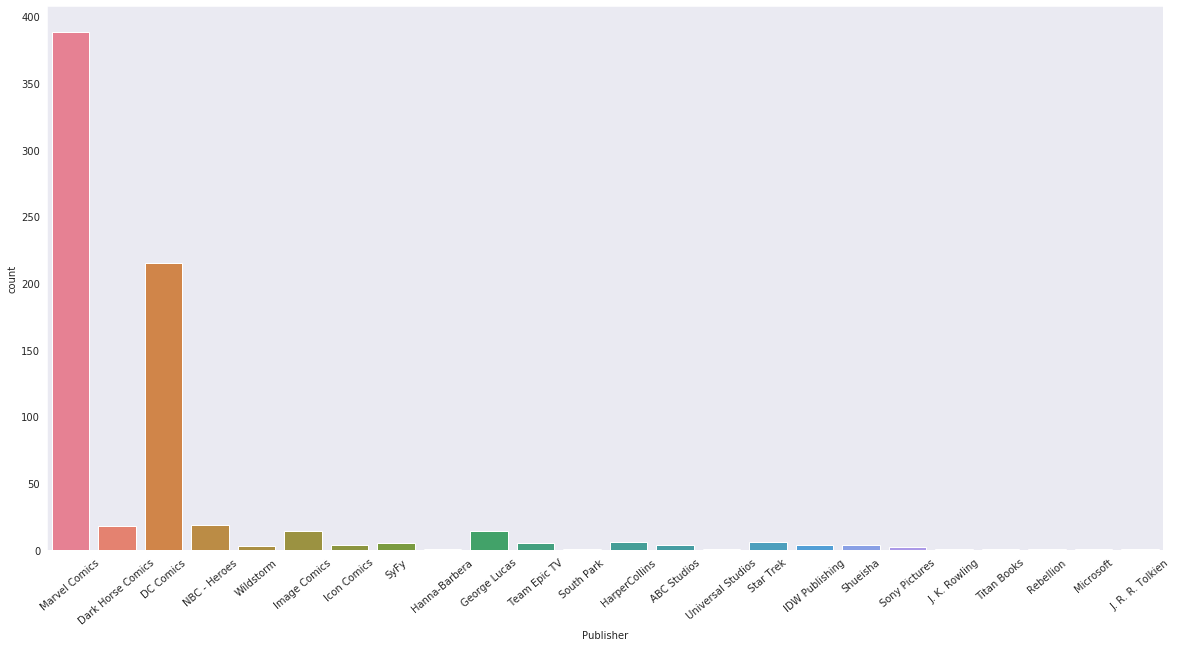

In [6]:
sns.set_style('dark')
plt.subplots(figsize=(20,10))
ax=sns.countplot(x='Publisher',data=df1,palette='husl')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)

In [13]:
df1=df1.drop('unnamed:0',axis=1)


SyntaxError: invalid syntax (<ipython-input-13-2c78583f5b03>, line 2)

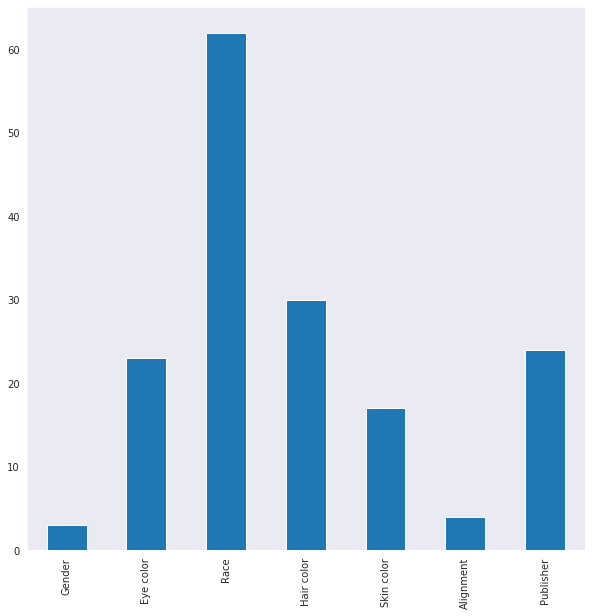

In [14]:
labels=['Gender','Eye color','Race','Hair color','Skin color','Alignment','Publisher']
df1[labels]=df1[labels].replace('-','Unknown')
df1[labels]=df1[labels].apply(lambda x:x.astype('category'),axis=0)
unique_cat=df1[labels].apply(pd.Series.nunique,axis=0)
unique_cat.plot(kind='bar',figsize=(10,10))


In [15]:
df1.describe()


,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


/home/guyinahat/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/guyinahat/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


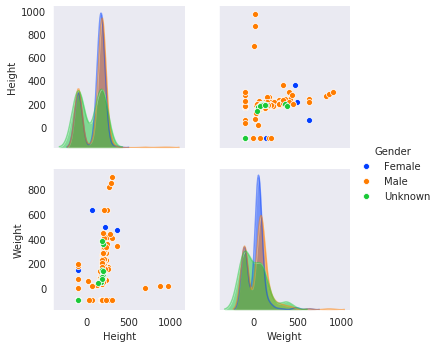

In [17]:
sns.pairplot(data=df1,vars=['Height','Weight'],kind='scatter',hue='Gender',palette='bright',diag_kws={'alpha':.5})

In [18]:
df1['Height']=df1['Height']*0.393701  
df1['bmi']=(df1['Weight']*703)/(df1['Height']**2)

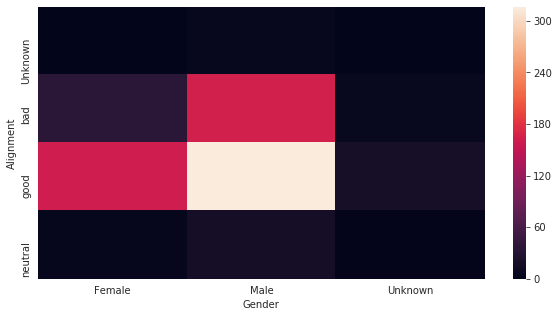

In [19]:
df1.loc[(df1.bmi<0),'body_type']='Unknown'
df1.loc[(df1.bmi>0) & (df1.bmi<16),'body_type']='Severe thinness'
df1.loc[(df1.bmi>16) & (df1.bmi<=17),'body_type']='Moderate thinness'
df1.loc[(df1.bmi>17) & (df1.bmi<=18.5),'body_type']='Mild thinness'
df1.loc[(df1.bmi>18.5) & (df1.bmi<=25),'body_type']='Normal'
df1.loc[(df1.bmi>25) & (df1.bmi<=30),'body_type']='Average'
df1.loc[(df1.bmi>30) & (df1.bmi<=40),'body_type']='Overweight'
df1.loc[(df1.bmi>=40),'body_type']='Obese'
sns.set_style("whitegrid")
plt.subplots(figsize=(10,5))
sns.heatmap(pd.crosstab(df1['Alignment'],df1['Gender']))

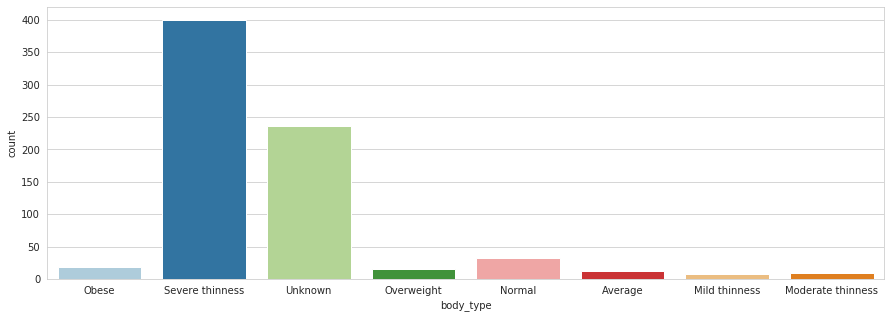

In [20]:
plt.subplots(figsize=(15,5))
sns.countplot(x='body_type',data=df1,palette='Paired')

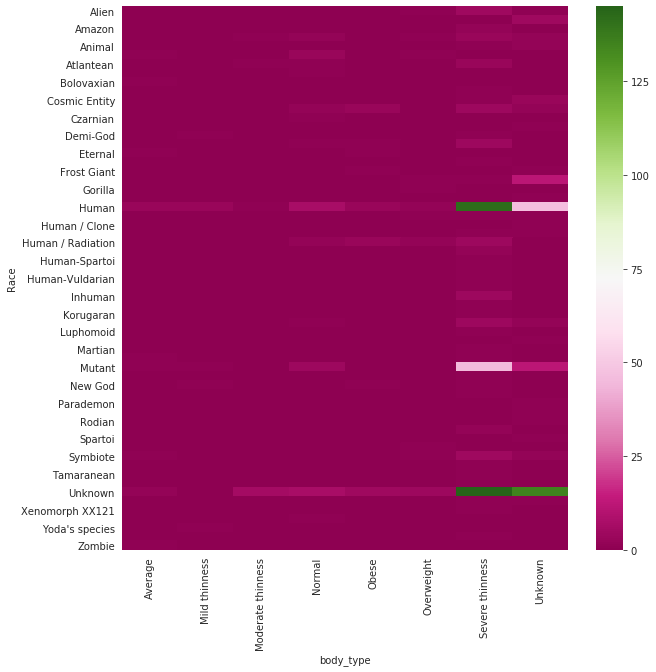

In [21]:
sns.set_style("dark")
plt.subplots(figsize=(10,10))
sns.heatmap(pd.crosstab(df1['Race'],df1['body_type']),cmap="PiYG")

In [22]:
df2.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df1['name'].duplicated().sum()

19

In [24]:
df1=df1.drop_duplicates(subset='name')
df=df1.set_index('name').join(df2.set_index('hero_names'))
df=df.drop(df1.drop(['name','Alignment'],axis=1).columns,axis=1)
df.head()


,Alignment,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,good,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,good,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,good,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,bad,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,bad,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


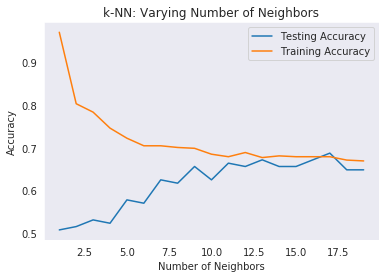

In [26]:
df=df.dropna(thresh=2)
dfnew=df[~(df['Alignment']=='Unknown')] 
new_data=df[df['Alignment']=='Unknown'] 
from sklearn.model_selection import train_test_split
X=dfnew.drop('Alignment',axis=1)
y=dfnew['Alignment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,20)  
train_acc=np.empty(len(neighbors))
test_acc=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_acc[i]=knn.score(X_train,y_train)
    test_acc[i]=knn.score(X_test,y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_acc, label = 'Testing Accuracy')
plt.plot(neighbors, train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [27]:
newmodel=KNeighborsClassifier(n_neighbors=13)
newmodel.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [28]:
newmodel.score(X_test,y_test)

0.671875

In [29]:
new_data['Alignment_predict']=newmodel.predict(new_data.drop('Alignment',axis=1))

/home/guyinahat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
new_data['Alignment_predict']

name
Anti-Venom         good
Blackwulf          good
Brundlefly         good
Man of Miracles     bad
Q                  good
Trickster          good
Venompool          good
Name: Alignment_predict, dtype: object